In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
iris = pd.read_csv("/content/Iris.csv") #load the dataset

In [ ]:
iris.head(2) #show the first 2 rows from the dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


In [ ]:
iris.info()  #checking if there is any inconsistency in the dataset
#as we see there are no null values in the dataset, so the data can be processed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
iris.drop('Id',axis=1,inplace=True) #dropping the Id column as it is unnecessary, axis=1 specifies that it should be column wise,
# inplace =1 means the changes should be reflected into the dataframe
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Steps To Be followed When Applying an Algorithm

- Split the dataset into training and testing dataset. The testing dataset is generally smaller than training one as it will help in training the model better.
- Select any algorithm based on the problem (classification or regression) whatever you feel may be good.
- Then pass the training dataset to the algorithm to train it. We use the .fit() method
- Then pass the testing data to the trained algorithm to predict the outcome. We use the .predict() method.
- We then check the accuracy by passing the predicted outcome and the actual output to the model.


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn import metrics #for checking the model accuracy
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve


In [ ]:
X= iris.drop('Species', axis=1)
y=iris.Species


In [ ]:
# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform the categorical data
y_encode = label_encoder.fit_transform(y)
y_encode

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
train_X, test_X , train_y, test_y = train_test_split(X, y_encode, test_size = 0.3, random_state=30)# in this our main data is split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train_X.shape)
print(test_X.shape)


(105, 4)
(45, 4)


In [ ]:
train_X.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
59,5.2,2.7,3.9,1.4
94,5.6,2.7,4.2,1.3


In [ ]:
train_y

array([1, 1, 1, 1, 1, 0, 1, 2, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 2, 2,
       2, 0, 2, 1, 2, 0, 0, 1, 0, 2, 2, 2, 2, 0, 1, 0, 1, 1, 1, 2, 0, 1,
       0, 1, 2, 1, 0, 0, 0, 2, 2, 0, 1, 1, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0,
       2, 2, 2, 0, 2, 1, 1, 2, 1, 1, 1, 1, 2, 0, 1, 0, 1, 0, 0, 0, 2, 1,
       0, 0, 1, 2, 2, 2, 2, 0, 1, 2, 0, 2, 1, 2, 2, 0, 0])

In [ ]:
# Fitting the model
model = LogisticRegression()
model.fit(train_X,train_y)
prediction=model.predict(test_X)


In [ ]:
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_y))


The accuracy of the Logistic Regression is 0.9555555555555556


In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(test_y, prediction)
print('confusion matrix of test data : ' )
print(conf_matrix)

confusion matrix of test data : 
[[13  0  0]
 [ 0 12  1]
 [ 0  1 18]]


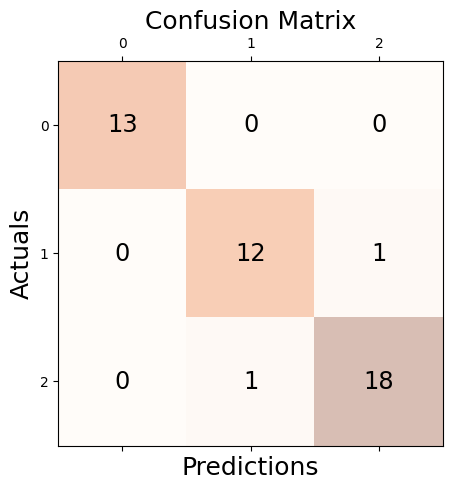

In [ ]:
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
#Precision Score = TP / (FP + TP)
#Average is required for multiclass/multilabel targets. If None, the scores for each class are returned.
# Otherwise, this determines the type of averaging performed on the data

precision_score(test_y, prediction, average=None)

array([1.        , 0.92307692, 0.94736842])

In [ ]:
# Recall Score = TP / (FN + TP)

recall_score(test_y, prediction, average=None)

array([1.        , 0.92307692, 0.94736842])

In [ ]:
# F1 Score = 2* Precision Score * Recall Score/ (Precision Score + Recall Score/)

f1_score(test_y, prediction, average=None)

array([1.        , 0.92307692, 0.94736842])

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Binarize the labels
y_train_bin = label_binarize(train_y, classes=[0, 1, 2])
y_test_bin = label_binarize(test_y, classes=[0, 1, 2])
n_classes = y_train_bin.shape[1]

n_classes

3

**<h1> ROC(Receiver Operating Characteristic) Curve </h1>**

ROC Curve for binary class

In [ ]:
# fpr, tpr, thresholds = roc_curve(test_y, prediction)
# plt.plot(fpr, tpr)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')

ROC Curve for multiclass

ROC curve is a graphical representation of the performance of a binary classification model at different classification thresholds. Since the Iris dataset is a multiclass classification problem with three classes (setosa, versicolor, and Virginia), we need to perform some modifications to apply the ROC curve.

One common approach is to create a ROC curve for each class using a one-vs-all strategy. This means you'll treat one class as the "positive" class and combine the other two classes into the "negative" class. Then you can calculate the true positive rate (sensitivity) and false positive rate for different classification thresholds. Here's a step-by-step guide:

**Preprocess the Data:** Load the Iris dataset and preprocess it if necessary. You might need to encode the target variable into numerical values.

**Choose a Class:** For each class (setosa, versicolor, virginica), treat it as the "positive" class, and combine the other two classes into the "negative" class.

**Train a Model:** Train a binary classifier for each class against the combined "negative" class.

**Calculate Probabilities**: Get the predicted probabilities for the positive class from each binary classifier.

**Calculate ROC Points:** For each class, calculate the true positive rate (sensitivity) and false positive rate at different classification thresholds.

**Plot ROC Curve:** Plot the ROC curve for each class. You can use libraries like matplotlib in Python to create the plots.

**Interpretation:** Analyze the ROC curves to understand the performance of your model for each class. A good classifier should have ROC curves that are close to the upper left corner (high sensitivity and low false positive rate).

In [ ]:
# Initialize arrays to store ROC curves and AUC scores
fpr = {}
tpr = {}
roc_auc = {}

#Initialize model for roc curve
model_roc = LogisticRegression()

In [ ]:
# Train the model and calculate ROC curves and AUC scores for each class
for i in range(n_classes):
    model_roc.fit(train_X, y_train_bin[:, i])
    y_pred_prob = model_roc.predict_proba(test_X)[:, 1]
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob)
    roc_auc[i] = auc(fpr[i], tpr[i])

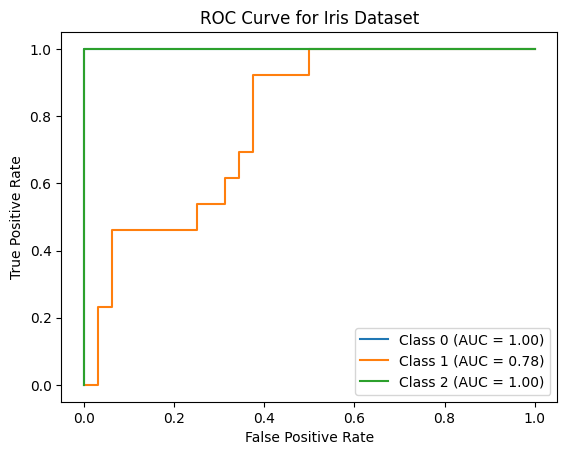

Class 0: ROC AUC = 1.00
Class 1: ROC AUC = 0.78
Class 2: ROC AUC = 1.00


In [ ]:
# Plot ROC curves
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='Class {} (AUC = {:.2f})'.format(i, roc_auc[i]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Iris Dataset')
plt.legend()
plt.show()

# Display ROC AUC scores for each class
for i in range(n_classes):
    print("Class {}: ROC AUC = {:.2f}".format(i, roc_auc[i]))